In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
#import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
# Checking Null Values in Our Data
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
data.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [7]:
apps=data.drop_duplicates(subset='App')
apps.shape

(9660, 13)

In [8]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [9]:
apps.drop(10472,inplace=True)

In [10]:
# Columns to clean 
cols = ['Installs','Price']
# Characters to remove
chars = ['+',",","$"]
# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
        # Replacing unnecessary characters with empty string
        apps[col] = apps[col].apply(lambda c: c.replace(char, ''))

apps.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [11]:
apps['Size']=apps['Size'].str.replace('M','000')
apps['Size']=apps['Size'].str.replace('k','')
apps['Size']=apps['Size'].replace("Varies with device",np.nan)
apps['Size']=apps['Size'].astype('float')
apps['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 9659, dtype: float64

In [12]:
###### Convert mega to kilo then convert all to mega
for i in apps['Size']:
    if i < 10:
        apps['Size']=apps['Size'].replace(i,i*1000)
apps['Size']=apps['Size']/1000
apps['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [13]:
apps['Reviews'] = apps["Reviews"].astype(int)
apps['Price'] = apps["Price"].astype('float64')
apps['Installs']=apps['Installs'].astype(int)

In [14]:
#### Change Last update into a datetime column
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])
apps['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9659, dtype: datetime64[ns]

In [15]:
apps['Updated_Day']=apps['Last Updated'].dt.day
apps['Updated_Month']=apps['Last Updated'].dt.month
apps['Updated_Year']=apps['Last Updated'].dt.year
apps.drop('Last Updated', axis=1, inplace=True)

In [16]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int32  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Updated_Day     9659 non-null   int32  
 13  Updated_Month   9659 non-null   int32  
 14  Updated_Year    9659 non-null   int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1018.7+ KB


In [17]:
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
802,Babbel – Learn Spanish,EDUCATION,4.4,54798,11.0,1000000,Free,0.0,Everyone,Education,20.7.2,4.4 and up,30,7,2018
10806,SnakeBite911 FR,MEDICAL,NaN,1,42.0,500,Free,0.0,Everyone,Medical,1.2,4.1 and up,9,10,2017
8056,Theme for Tecno Camon CX / C8,LIFESTYLE,4.6,147,9.8,10000,Free,0.0,Everyone,Lifestyle,1.0.1,4.0 and up,2,5,2017
10027,OMG Gross Zit - Date Nightmare,FAMILY,3.7,70105,67.0,10000000,Free,0.0,Everyone,Casual,1.0.3,4.1 and up,6,6,2018
7230,ACCEPT CE MARKING,PRODUCTIVITY,NaN,0,30.0,10,Free,0.0,Everyone,Productivity,1.0,4.1 and up,28,6,2018


In [18]:
apps.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Updated_Day          0
Updated_Month        0
Updated_Year         0
dtype: int64

In [19]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=apps[feature].dropna().sample(apps[feature].isnull().sum())               
    random_sample.index=apps[apps[feature].isnull()].index
    apps.loc[apps[feature].isnull(),feature]=random_sample

In [20]:
for col in apps:
    Random_value_imputation(col)

In [21]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Updated_Day       0
Updated_Month     0
Updated_Year      0
dtype: int64

In [22]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [23]:
num_features=[col for col in apps.columns if apps[col].dtype!='O']
num_data = apps[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [24]:
cat_features=[col for col in apps.columns if apps[col].dtype=='O']
categorical=apps[cat_features]
categorical.head()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


##Category Column

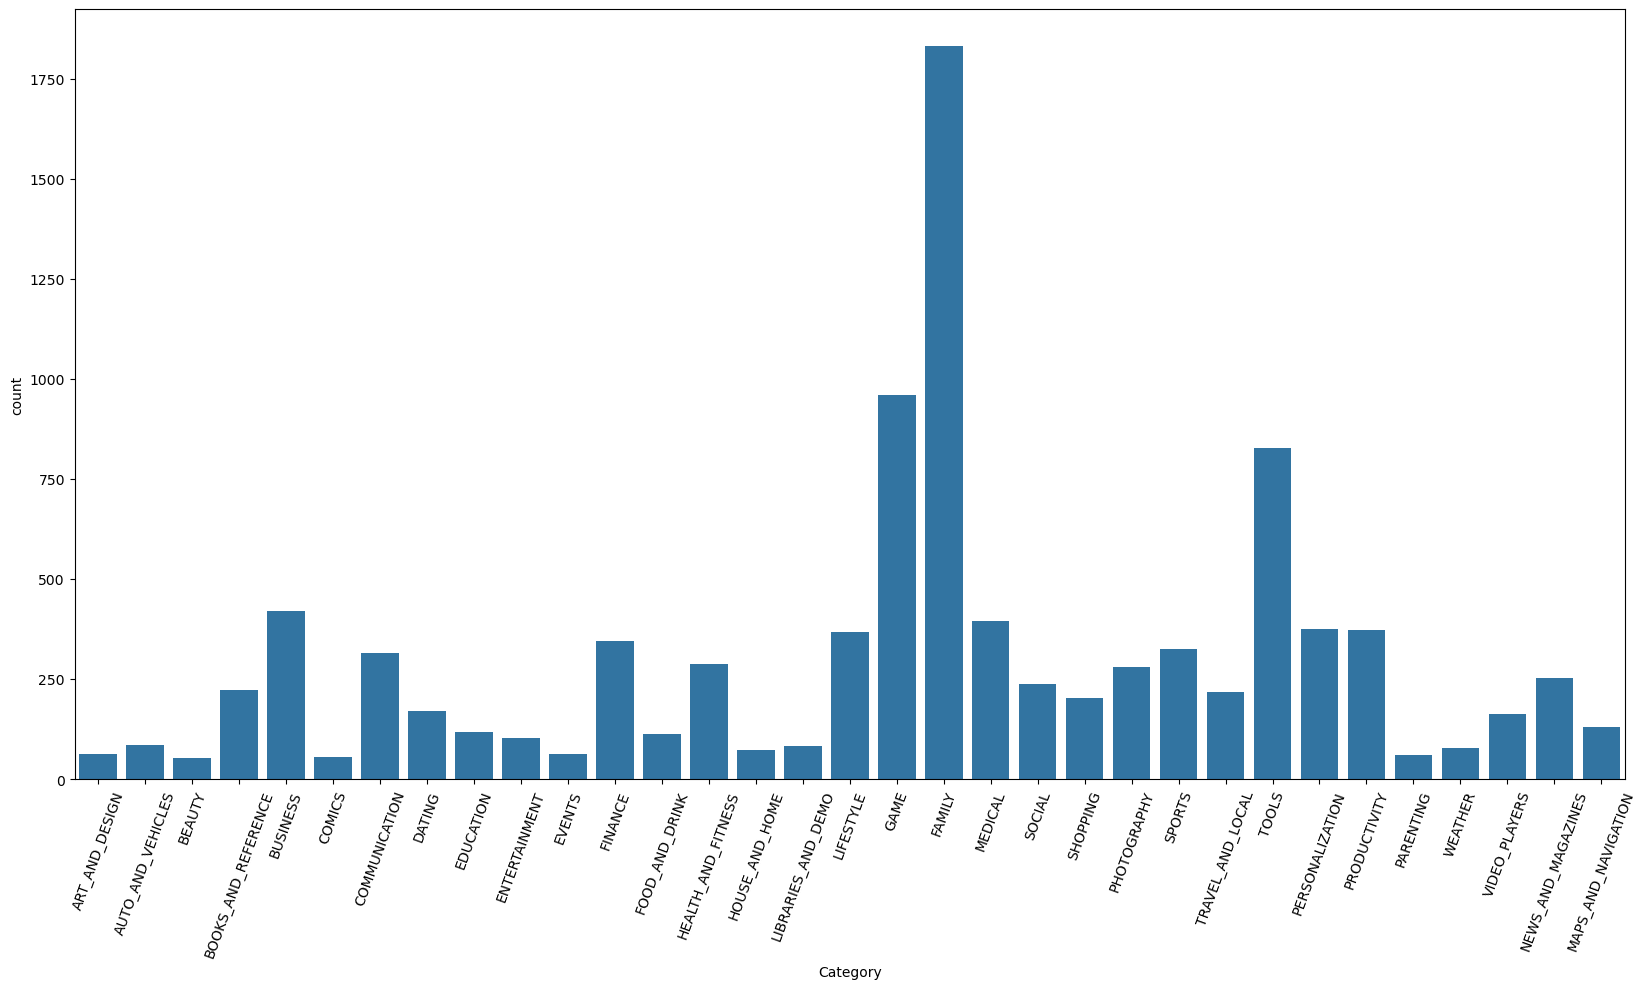

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=apps)
plt.xticks(rotation=70);

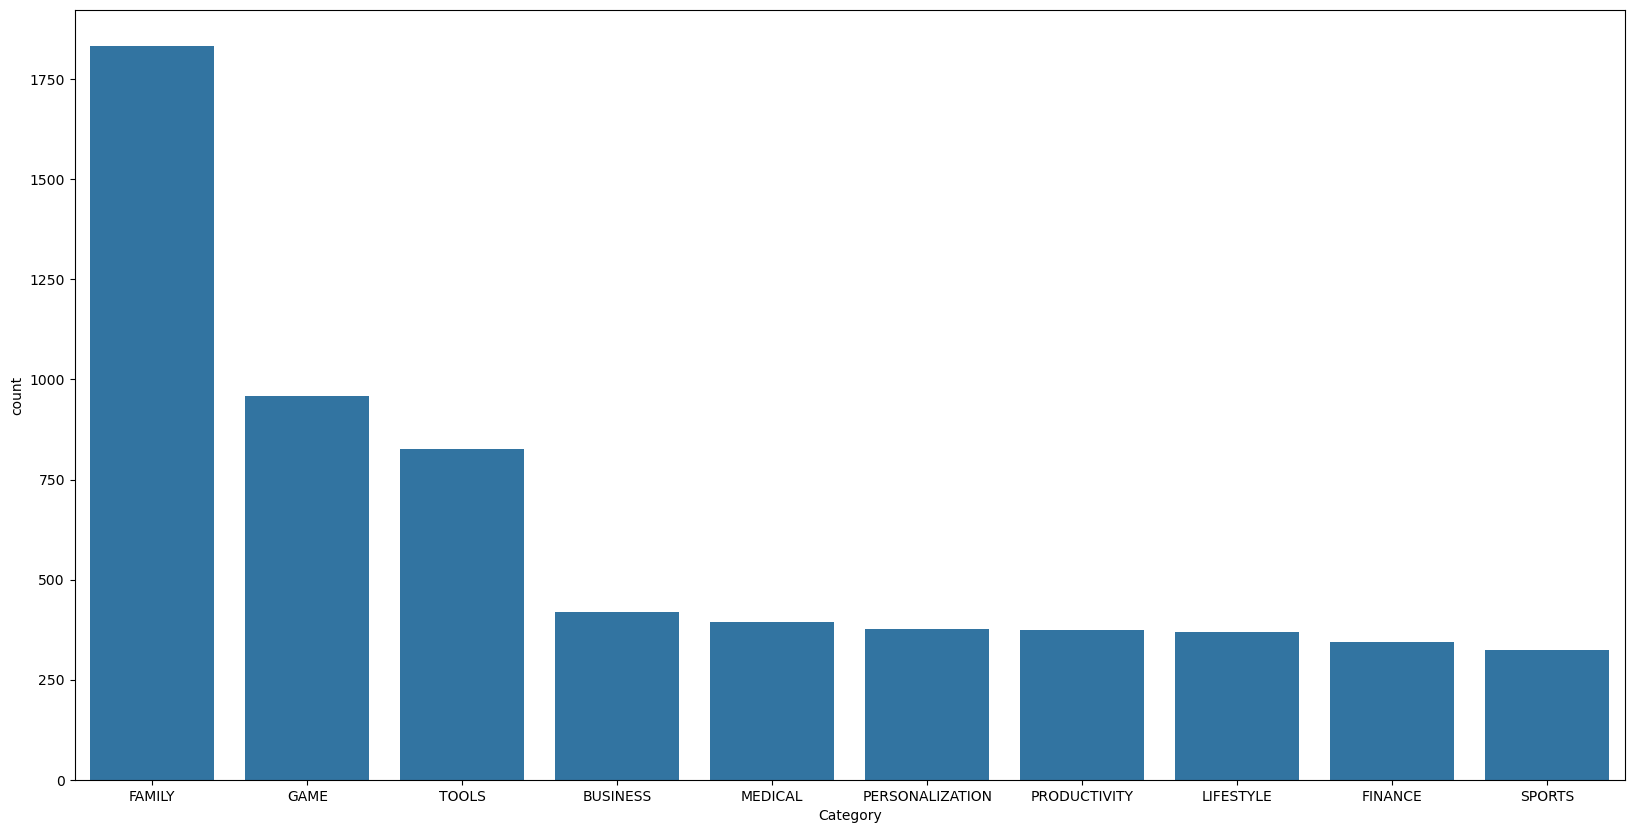

In [26]:
counts = apps['Category'].value_counts()
top_10_counts = counts.nlargest(10)
sns.barplot(top_10_counts)
plt.show()

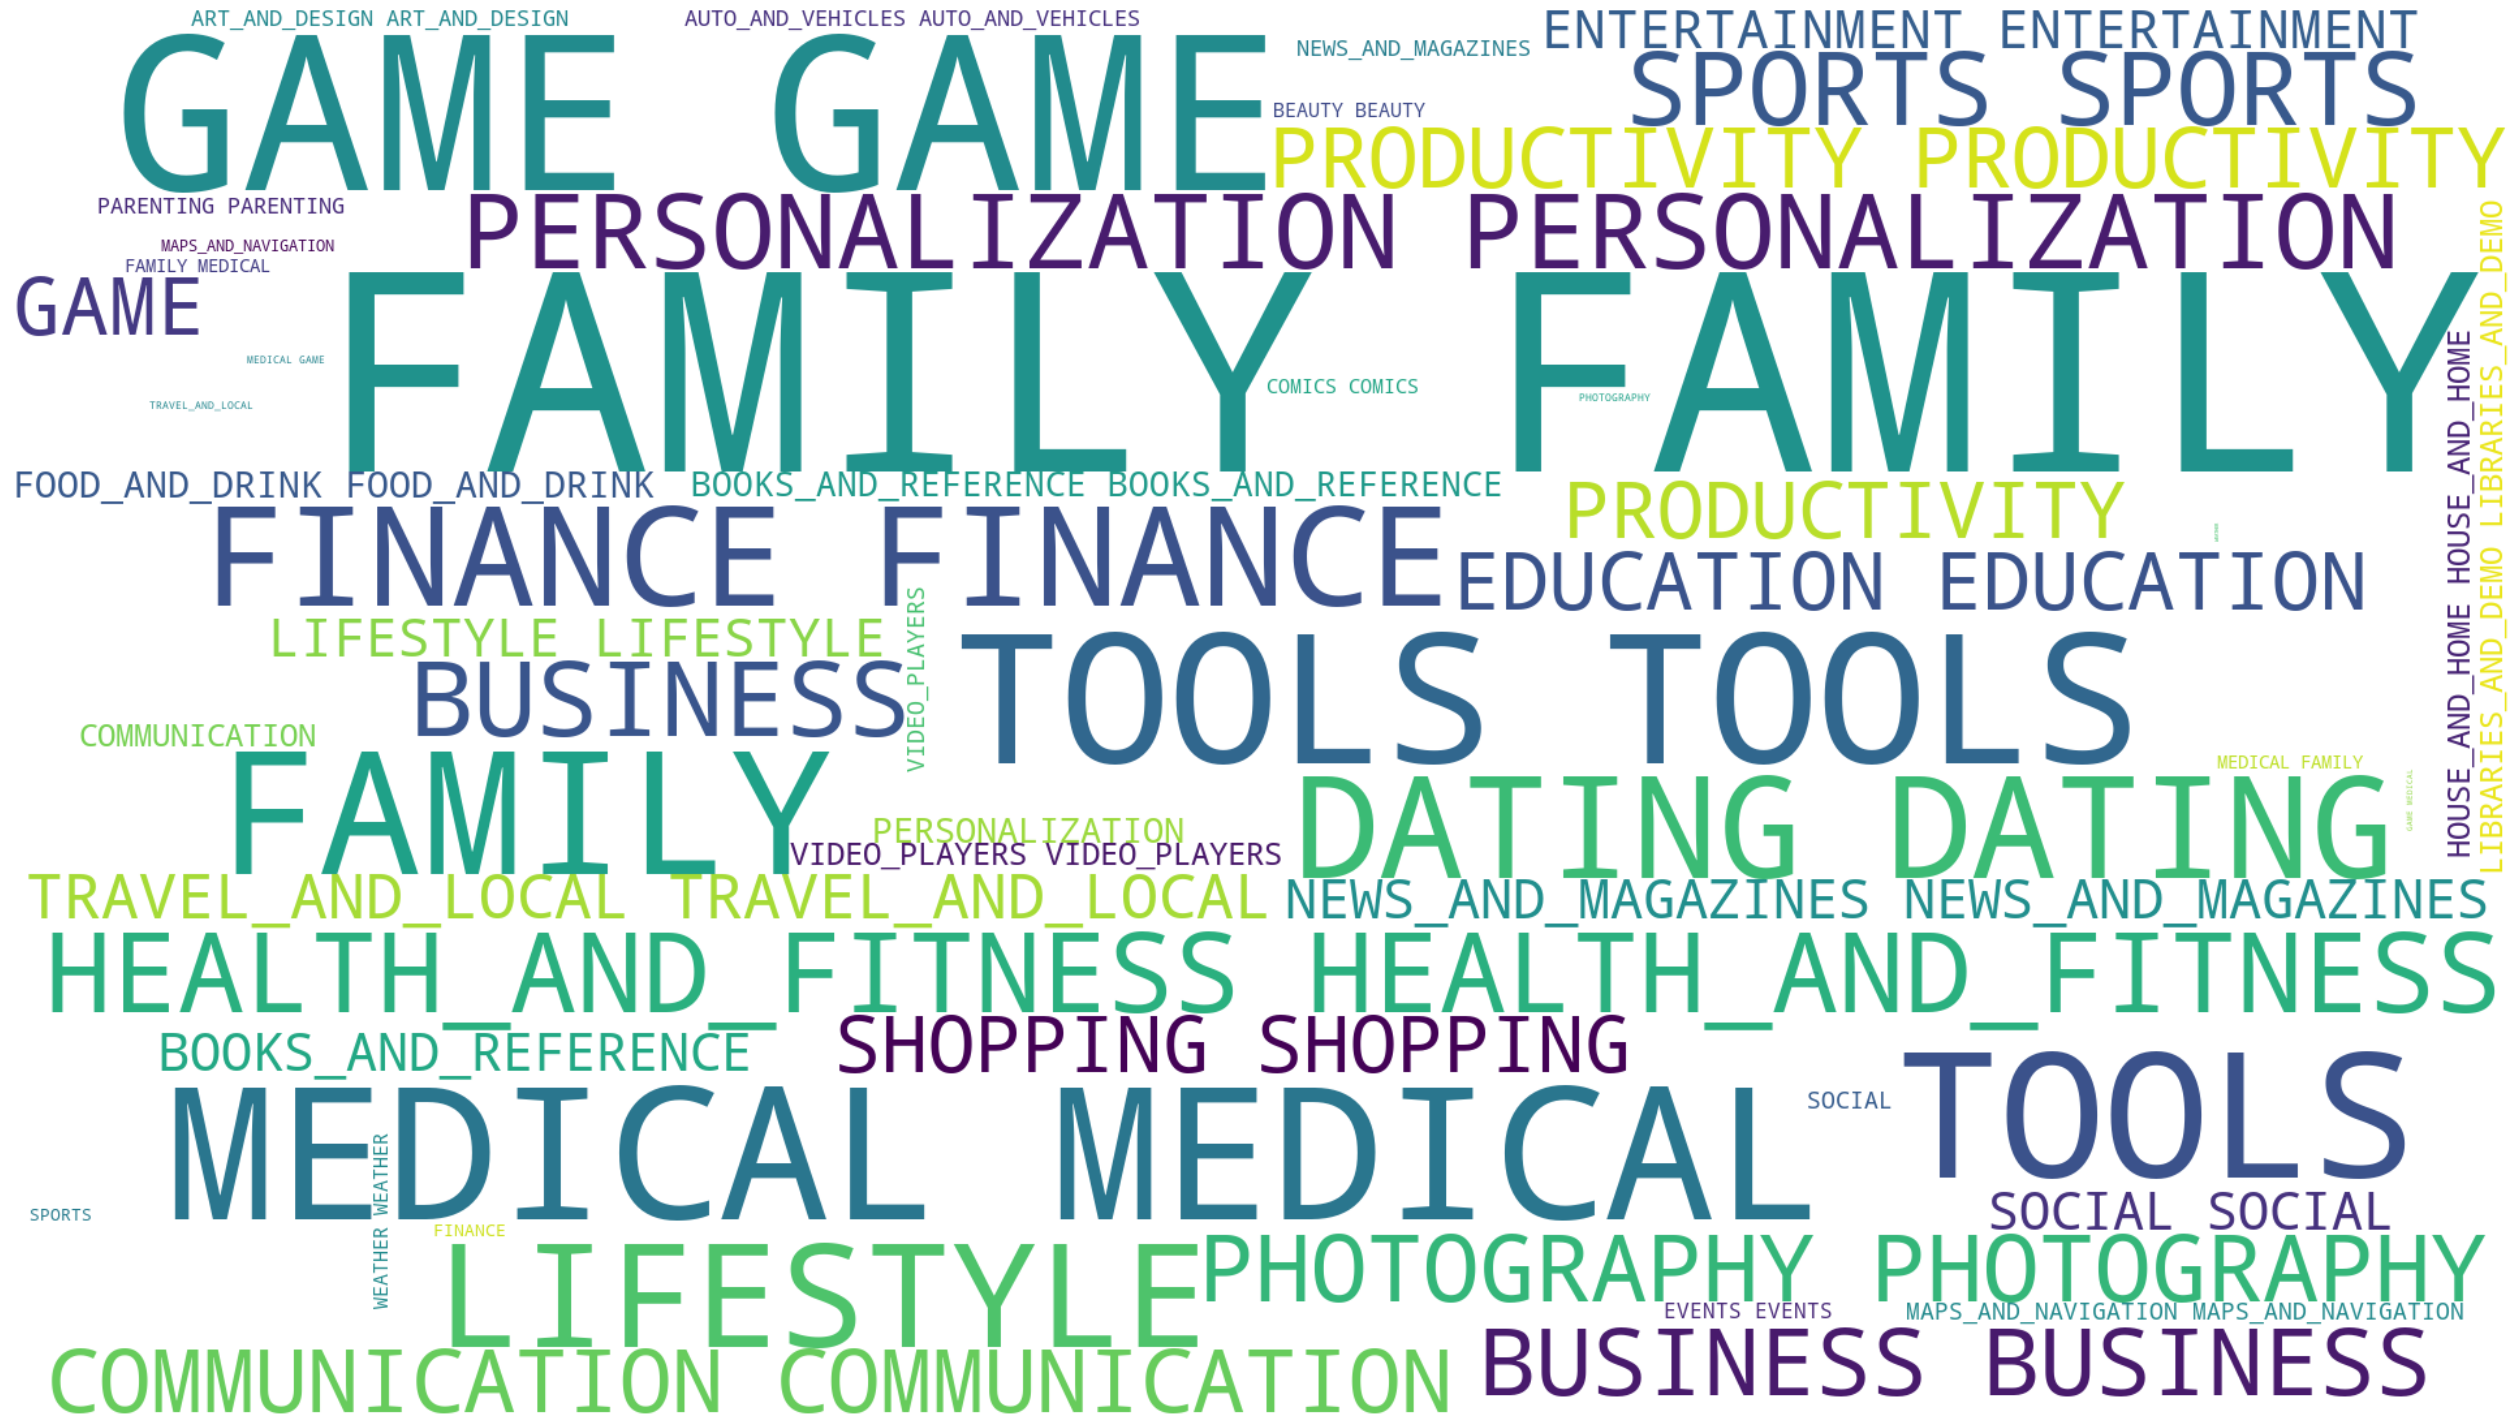

In [27]:
plt.subplots(figsize=(25,15))
text = str(list(apps['Category'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(text)
#(" ".join(apps.Category))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
Category1 = apps[data.Category=="GAME"].Rating
Category2 = apps[data.Category=="FAMILY"].Rating
Category3 = apps[data.Category=="MEDICAL"].Rating

fig = go.Figure()
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='MEDICAL'))

fig.show()

C:\Users\HFCS\AppData\Local\Temp\ipykernel_1564\731042000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Category1 = apps[data.Category=="GAME"].Rating
C:\Users\HFCS\AppData\Local\Temp\ipykernel_1564\731042000.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Category2 = apps[data.Category=="FAMILY"].Rating
C:\Users\HFCS\AppData\Local\Temp\ipykernel_1564\731042000.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Category3 = apps[data.Category=="MEDICAL"].Rating


##Type Column

In [29]:
categorical['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2016ebbdd30>,
 [Text(-0.2677607018859681, -1.066913401605554, ''),
  Text(0.26776060199432433, 1.0669134266751157, '')],
 [Text(-0.14605129193780078, -0.5819527645121203, '92.2%'),
  Text(0.1460512374514496, 0.5819527781864267, '7.8%')])

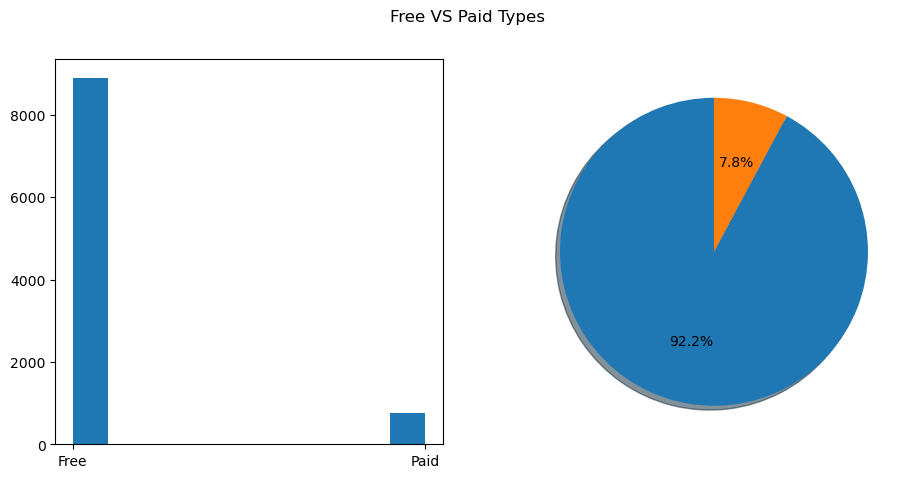

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Free VS Paid Types')
axes[0].hist(x='Type',data=categorical)
plt.xticks(rotation=70)
axes[1].pie(x=categorical["Type"].value_counts(),autopct = "%1.1f%%",shadow=True, startangle=90)

##Type VS Rating

<Figure size 1500x800 with 0 Axes>

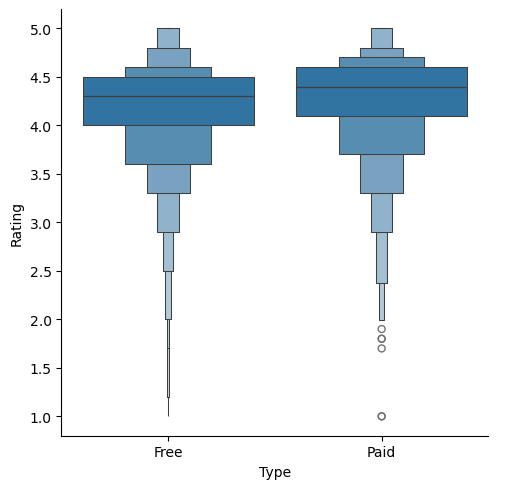

In [31]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = apps.sort_values('Rating',ascending=False)
            ,kind='boxen')

##Content Rating Column

In [32]:
categorical['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

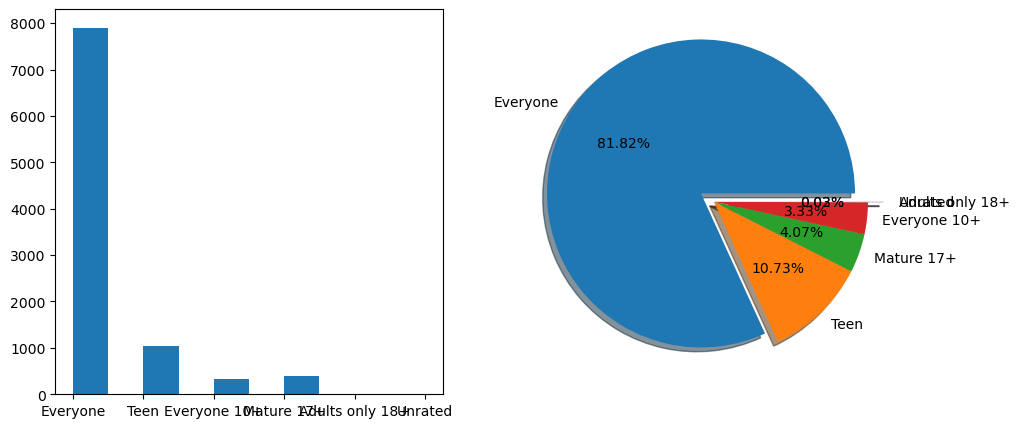

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].hist(x='Content Rating',data=apps)
plt.xticks(rotation=70);
values = apps['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+','Unrated']
explode = (.1,0,0,0,0.1,.1)
axes[1].pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)
plt.show()

Content Rating vs Rating Analysis

<Axes: xlabel='Content Rating', ylabel='Rating'>

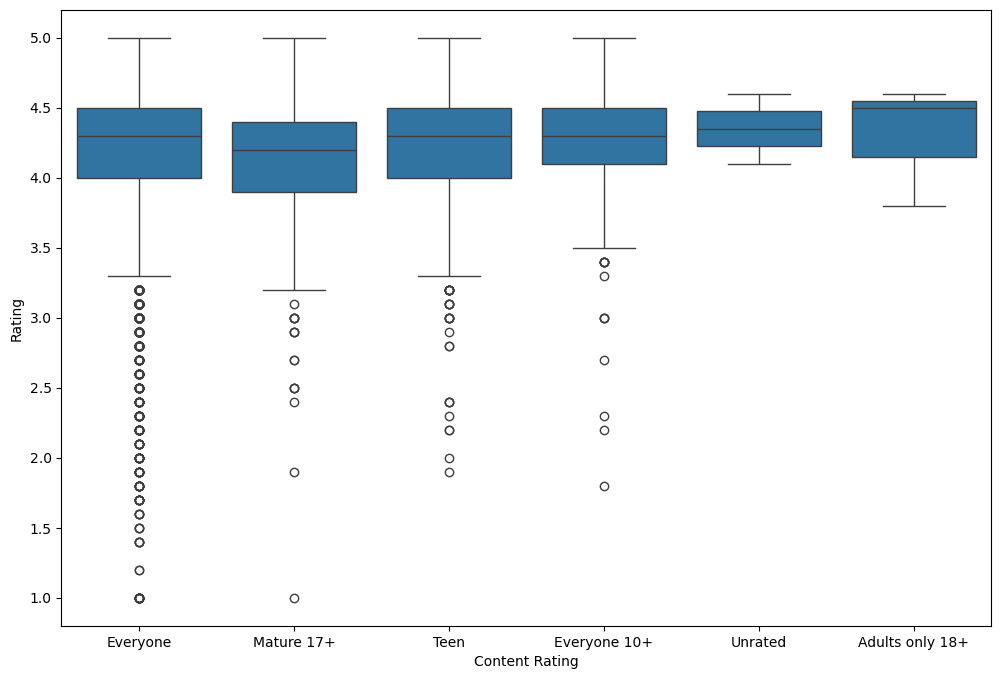

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = apps.sort_values('Rating',ascending=False))


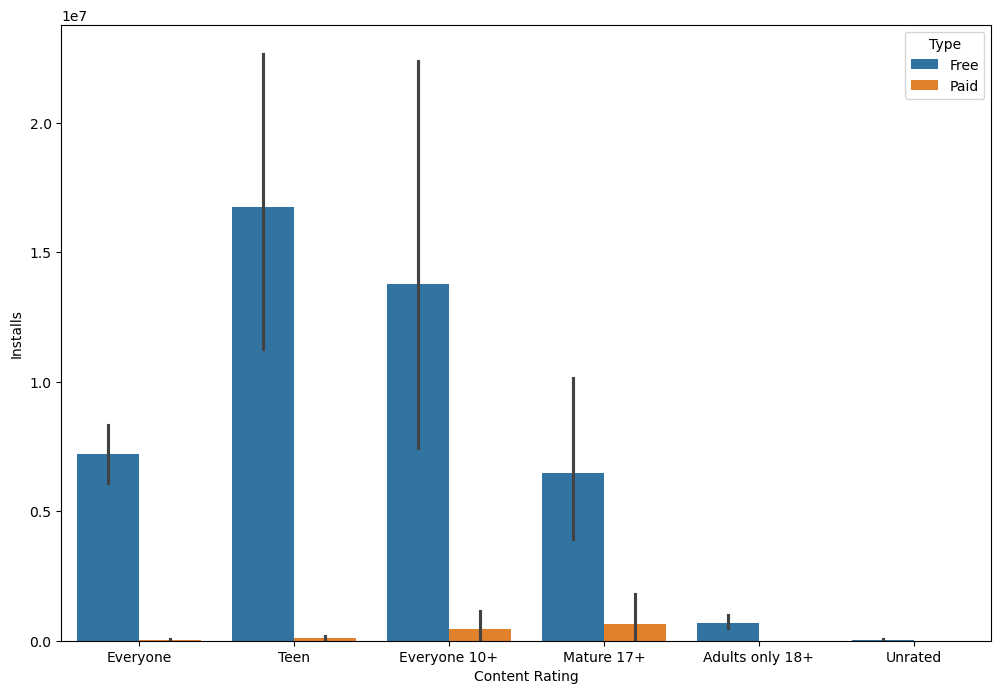

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=apps)
#fig=px.bar(apps,x="Content Rating", y="Installs",color='Type',barmode='group')
plt.show()

Genres Column

In [36]:
categorical['Genres'].value_counts()

Genres
Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: count, Length: 118, dtype: int64

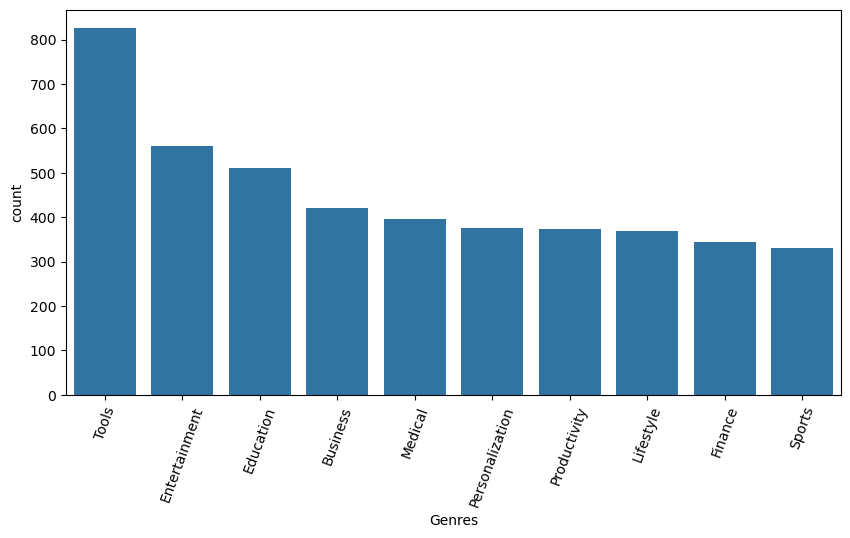

In [37]:
gener_counts=categorical['Genres'].value_counts()
top_10_geners = gener_counts.nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(top_10_geners)
plt.xticks(rotation=70);
plt.show()

In [38]:
def kde_plot(feature):
    grid = sns.FacetGrid(apps, hue="Type",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

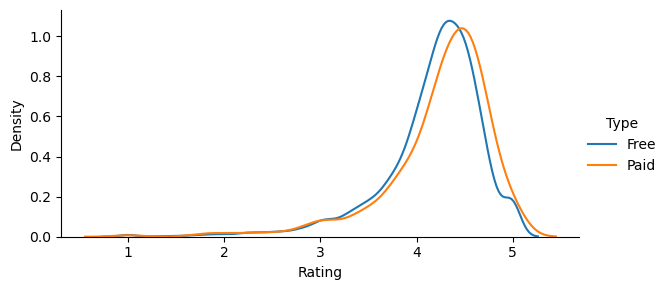

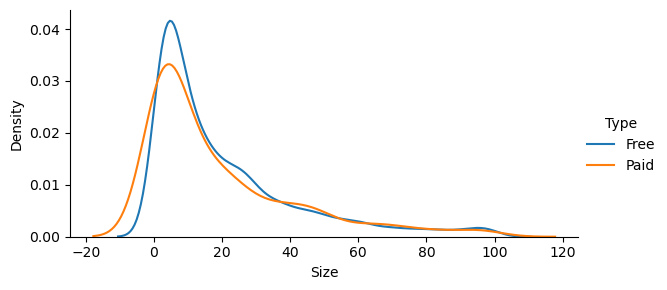

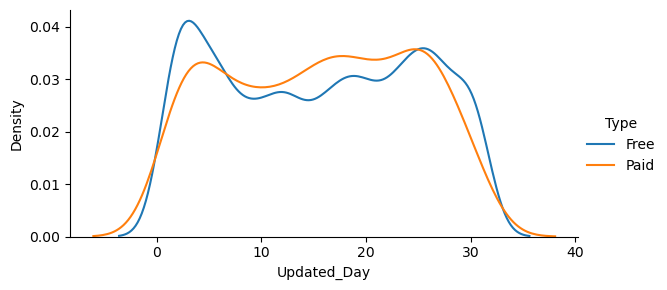

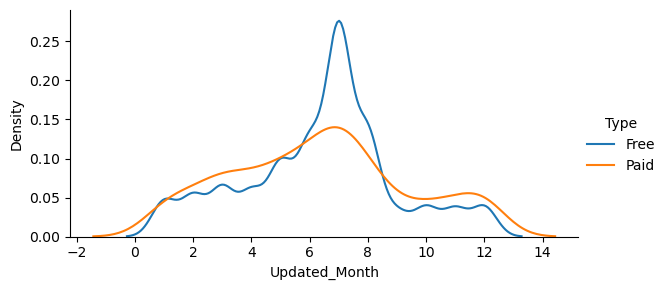

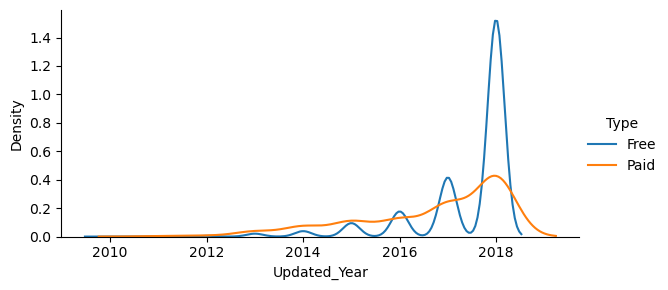

In [39]:
for col in ['Rating','Size','Updated_Day','Updated_Month','Updated_Year']:
    kde_plot(col)

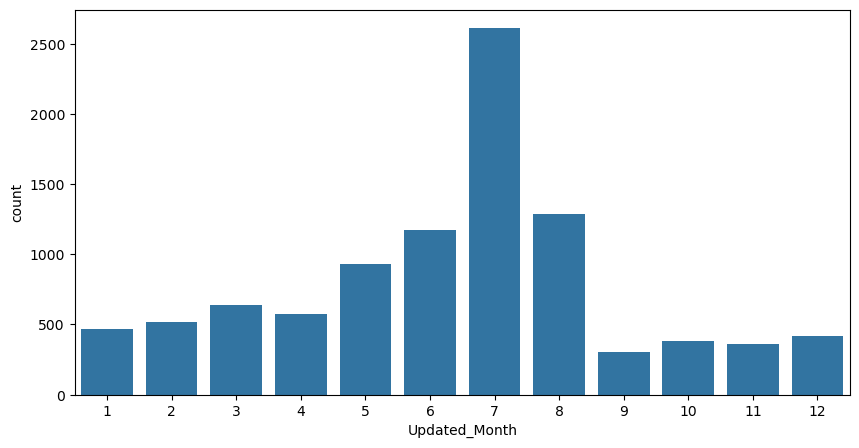

In [181]:
plt.figure(figsize=(10,5))
sns.countplot(data=apps,x='Updated_Month')
plt.show()

Text(0.5, 1.0, 'Time series plot of Last Updates')

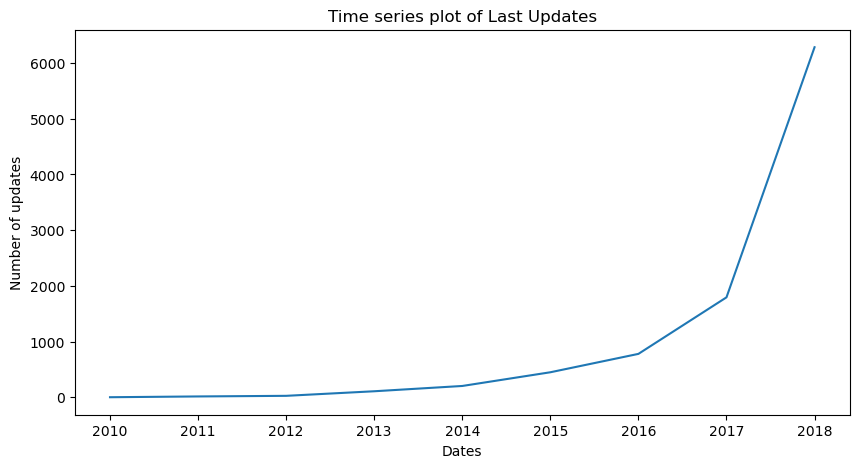

In [182]:
plt.figure(figsize=(10,5))
freq= pd.Series()
freq=apps['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

In [183]:
apps.to_csv('cleaned_data.csv', index = False)